**MODEL VALIDATION TYPES**

1. Holdout Method : based on train-test splitting 

2. K-Fold Cross Validation :  After splitting the "X" data to train and test.We parse the train set into pieces(Lets say Train=[1,2,3,4,5]).
Then we leave one out([1,2,3,4]-[5]),and create model with remained parts.
In the next step,we take in the one we left outside,and then take out another one[1,2,3,5]-[4].
We do that for all elements.After we finish validating,it creates a model to use for "Y".

3. Leave one out : It's similar to the K-Fold method,but it's applied to every sample of the data,which means it's not time efficient

4. Bootstrap : It's based on replacing elements on the dataset


**Model Error Evaluation**

-MSE : Mean Square Error
-RMSE : Root of Mean Square Error


**Bias-Variance Tradeoff**

- High Bias : It leads to the "Underfitting" which means the model doesn't have an efficient learning rate.

- Low Variance - Low Variance : TRUE MODEL ,  EFFICIENT MODEL

- High Variance : It leads to overfitting, which means it memorizes the train set so it won't be efficient for test value. 


**yi = b0 + b1xi**

Our main goal is to find b0 and b1 for the given operation so that the result should be as near as possible to the real value

# **SIMPLE LINEAR REGRESSION**

In [3]:
import pandas as pd

df = pd.read_csv("/content/Advertising.csv")
df = df.iloc[:,1:len(df)]
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


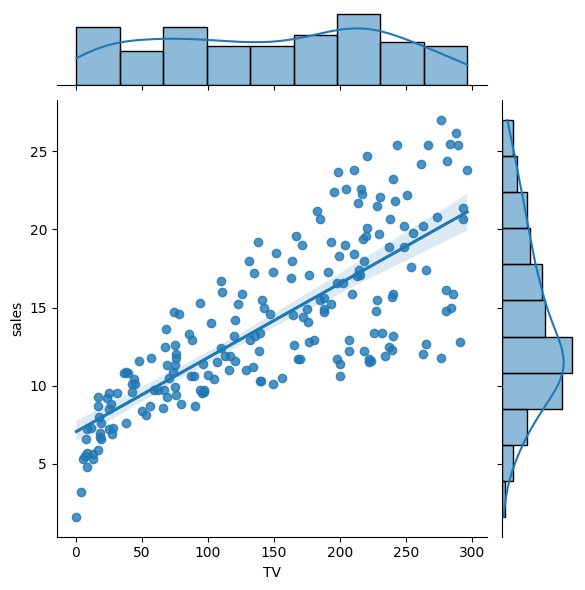

In [6]:
import seaborn as sns

sns.jointplot(x="TV",y="sales",data=df,kind="reg")

In [12]:
#Creating Model

from sklearn.linear_model import LinearRegression

X = df[["TV"]]     # We take them under double brackets so it becomes 1-dim array,not a vector anymore
y= df[["sales"]]

X.shape

reg = LinearRegression()
model = reg.fit(X,y)
dir(model)       
#"coef": b1   "intercept": b0  "score":r^2() ;  
# r^2 : Percentage of change in dependent variables explained by independent variables

['__abstractmethods__',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_feature_names',
 '_check_n_features',
 '_decision_function',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_parameter_constraints',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_set_intercept',
 '_validate_data',
 '_validate_params',
 'coef_',
 'copy_X',
 'feature_names_in_',
 'fit',
 'fit_intercept',
 'get_params',
 'intercept_',
 'n_features_in_',
 'n_jobs',
 'positive',
 'predict',
 'rank_',
 'score',
 'set_params',
 'singular_']

In [14]:
print(model.intercept_) # "intercept": b0 
print(model.coef_)      # "coef": b1 
print(model.score(X,y)) # "score":r^2() 

[7.03259355]
[[0.04753664]]
0.611875050850071


(0.0, 28.27)

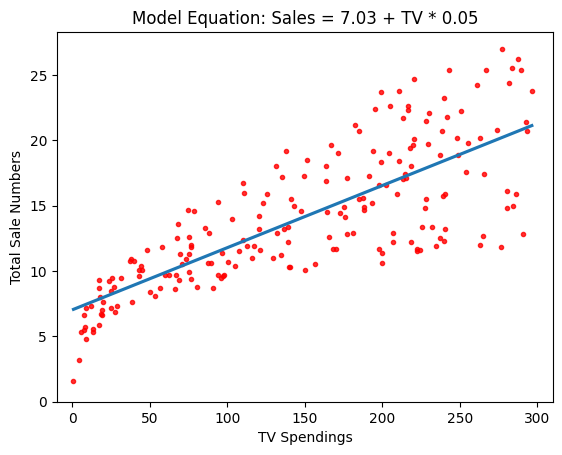

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

g = sns.regplot(x=df["TV"],
                y=df["sales"],
                ci=None,
                scatter_kws={"color":"r","s":9})
g.set_title("Model Equation: Sales = 7.03 + TV * 0.05")
g.set_xlabel("TV Spendings")
g.set_ylabel("Total Sale Numbers")
plt.xlim(-10,310)
plt.ylim(bottom=0)

In [25]:
# Prediction
tv=165

Sales = 7.30 + 0.05 * tv
Sales

Sales = model.intercept_ + model.coef_ * 165
Sales

array([[14.87613922]])

Prediction using sklearn:

In [27]:
model.predict([[165]]) # It gives the same result above for only one value prediction

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[14.87613922]])

In [29]:
new_Data = [[5],[15],[30]]
model.predict(new_Data)     #It gives prediction results for every given x values


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[7.27027675],
       [7.74564316],
       [8.45869276]])

**Residuals**
- MSE
- RMSE

In [30]:
model.predict(X)[0:6]

array([[17.97077451],
       [ 9.14797405],
       [ 7.85022376],
       [14.23439457],
       [15.62721814],
       [ 7.44616232]])

In [32]:
predicted_y=pd.DataFrame(model.predict(X)[0:10])
true_y=pd.DataFrame(y[0:10])
errors=pd.concat([predicted_y,true_y] , axis=1)
errors.columns=["predicted","true"]
errors

,predicted,true
0,17.970775,22.1
1,9.147974,10.4
2,7.850224,9.3
3,14.234395,18.5
4,15.627218,12.9
5,7.446162,7.2
6,9.765950,11.8
7,12.746498,13.2
8,7.441409,4.8
9,16.530414,10.6


In [35]:
errors["errors"] = errors['true'] - errors["predicted"]
errors

,predicted,true,errors
0,17.970775,22.1,4.129225
1,9.147974,10.4,1.252026
2,7.850224,9.3,1.449776
3,14.234395,18.5,4.265605
4,15.627218,12.9,-2.727218
5,7.446162,7.2,-0.246162
6,9.765950,11.8,2.034050
7,12.746498,13.2,0.453502
8,7.441409,4.8,-2.641409
9,16.530414,10.6,-5.930414


In [37]:
errors["squares"] = errors['errors']**2
errors

,predicted,true,errors,squares
0,17.970775,22.1,4.129225,17.050503
1,9.147974,10.4,1.252026,1.567569
2,7.850224,9.3,1.449776,2.101851
3,14.234395,18.5,4.265605,18.195390
4,15.627218,12.9,-2.727218,7.437719
5,7.446162,7.2,-0.246162,0.060596
6,9.765950,11.8,2.034050,4.137358
7,12.746498,13.2,0.453502,0.205664
8,7.441409,4.8,-2.641409,6.977040
9,16.530414,10.6,-5.930414,35.169814


In [39]:
import numpy as np
np.mean(errors["squares"]) #It will give us the mean of square error

9.290350329638102